<center>
<img src="logo.png" height="900"> 
</center>


# Контрольная работа :)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot') # стиль для графиков
%matplotlib inline

В файле `cr.csv` лежат результаты контрольной работы, которая проводилась в Вышке на факультете "Э".  По мнению студентов эти оценки смещённые, несостоятельные и ужасно неэффективные. Но это уже совершенно другая история. Подгрузим файлик и посмотрим на него!  

In [2]:
df = pd.read_csv('cr.csv', sep='\t')
print(df.shape)
df.head()

(389, 20)


,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,eds_python_2020_2,1.0,9.0,10.0,20.0,NaN,16.0,12.0,6.7,NaN,5.0,NaN,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,eds_python_2020_3,0.0,2.0,10.0,20.0,NaN,20.0,30.0,8.2,20.0,5.0,NaN,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,eds_python_2020_4,1.0,10.0,10.0,20.0,NaN,16.0,14.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


__Описание колонок:__


* `contest_login` - уникальный идентификатор студента
* `fraud` - в списывании скольки задач был уличён студент 
* `k1` - результат за первую контрольную, `k1a - k1f` в разбивке по задачам
* `k2` - результат за вторую контрольную, `k2a - k2f` в разбивке по задачам
* `k3` - результат за третью контрольную, `k3a - k3с` в разбивке по задачам

__а) Распределение результатов контрольной__ 

- Запишите все оценки за первую контрольную в переменную `x`, все пропуски удалите
- Найдите среднее и стандартное отклонение (используйте несмещённую оценку) 
- Постройте гистограмму результатов за первую контрольную 
- На этой же картинке постройте плотность нормального распределения со средним и стандартным отклонением, посчитанными выше

Похоже ли эмпирическое распределение на нормальное? 

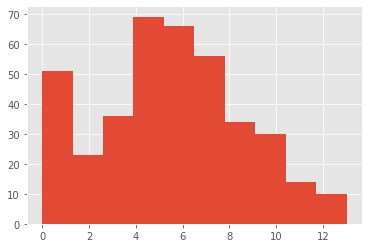

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

x = df['k1']

x_mean = x.mean()
x_std = x.std(ddof = 1)

x.hist()


In [4]:
# проверка, что среднее и стандартное откланение посчитаны корректно
assert np.abs(x_mean - 5.4478149100) < 1e-5

# похожие тесты на другие части задания скрыты от вас


По аналогии с тем, как это было сделано на лекции, проверьте с помощью теста Колмогорова-Смирнова гипотезу о нормальности: 

- Используйте функцию `kstest` из пакета `scipy`
- С помощью `.pvalue` вытащите из результатов теста p-значение, запишите его в переменную `pvalue`
- По аналогии запишите в `K` значение статистики Колмогорова
- Если p-значение оказалось больше $0.05$, гипотеза о нормальности данных не отвергается, и мы можем дальше использовать эту предпосылку

In [5]:
# will the code be with you
norm_test = stats.kstest(df.k1, 'norm', args=(df.k1.mean(), df.k1.std(ddof=1)))
pvalue = norm_test.pvalue
K = norm_test.statistic

In [6]:
# проверка, что pvalue найдено корректно
assert np.abs(K - 0.051247) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Предположим невероятное! А именно, независимость и одинаковую распределённость наших наблюдений (никто не списывал контрольную друг у друга).

__б) Интервал для среднего.__ 

Постройте точный $95\%$-й доверительный интервал для ожидамоего результата за первую контрольную. В качестве оценки стандартного отклонения используйте несмещённый вариант, `ddof=1`. В переменные `left` и `right` запишите границы получившегося интервала. В переменную `delta` его ширину. 

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
n = df.k1.count()
student_rv = stats.t(n -1 )

alpha = 0.05
z_crit = student_rv.ppf(1 - alpha/2)

mu_hat = df.k1.mean() 
var_hat = df.k1.var(ddof=1)
n = df.k1.count()

left = mu_hat - z_crit*np.sqrt(var_hat/n)
right = mu_hat + z_crit*np.sqrt(var_hat/n)
delta = right - left

In [8]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 5.13247213744281) < 1e-5

# похожие тесты на другие части задания скрыты от вас


__в) Ангелы и демоны__

Переменная`fraud` - в списывании скольки задач был уличён студент. Разобьём наши наблюдения на две группы: Ангелы и Демоны. У Ангелов `fraud == 0`, у Демонов `fraud > 0`. 

Запишите оценки за первую контрольную для ангелов в переменную `angels`, для демонов в `demons`. Все пропуски из выборки удалите. Постройте на общем фоне гистограмму распределения оценок за первую контрольную у Ангелов и Демонов. 

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

angels = df[df['fraud'] == 0]['k1']
demons = df[df['fraud'] > 0]['k1']

# your code here


In [10]:
# проверка того, сколько в выборке оказалось ангелов и демонов
assert len(angels) == 109

# похожие тесты на другие части задания скрыты от вас


__г) Интервал для разницы средних__ 

Постройте примерный $95\%$-й доверительный интервал для разницы ожидаемого результата за первую контрольную у Ангелов и Демонов без предположения о равенстве дисперсий (интервал Уэлча). Для оценки всех дисперсий используйте несмещённый вариант. Заполните все переменные, перечисленные ниже. 

In [11]:
diff = angels.mean()- demons.mean()
nx, ny = angels.size, demons.size
diff_sd = np.sqrt(angels.var(ddof = 1)/nx + demons.var(ddof = 1)/ny)

u = (angels.var(ddof = 1) / nx + demons.var(ddof = 1) / ny) ** 2
d = (angels.var(ddof = 1)**2) / (nx**2 * (nx - 1)) + (demons.var(ddof = 1)**2)/ (ny**2* (ny - 1))
nu =  u/d 
print("Число степеней свободы:", nu)

left, right = stats.t.interval(0.95, df=nu, loc=diff, scale=diff_sd)
delta = right - left
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, delta))


Число степеней свободы: 191.6860656421597
Доверительный интервал [-0.8046; 0.547] ширины 1.352


In [12]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.8045581262764373) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Входит ли в получившийся доверительный интервал ноль? Как думаете, что это означает? 

__д) Интервал для дисперсии__ 

Предположим, что математическое ожидание результата за контрольную зависит от уровня подготовки, а дисперсия результата — от нервов. Постройте для отношения нервозности Демонов и Ангелов $95\%$ доверительный интервал. Для оценки всех дисперсий используйте несмещённый вариант. 

In [13]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
n, m = angels.size - 1, demons.size - 1
sn, sm = angels.var(), demons.var()
alpha = 0.05
left =  ...     # левая граница интервала
right = ...     # правая граница интервала
delta = ...     # ширина интервала

# your code here
left = sm / sn * stats.f(n, m).ppf(alpha/2)
right = sm / sn * stats.f(n, m).ppf(1 - alpha/2)
delta = right - left

print("Доверительный интервал [{:.5}; {:.5}] ширины {:.5}".format(left, right, delta))

Доверительный интервал [0.61204; 1.1624] ширины 0.55034


In [14]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 0.6120428247687726) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Вошла ли в доверительный интервал единица? Как думаете, что это означает? 

__е) Ангелы и демоны решают задачки__ 

Нарисуйте картинку для корреляционной матрицы по задачам первой контрольной для всех наблюдений, отдельно для Ангелов и Демонов. Пропуски заполните нулями. Будем считать, что если у студента нет оценки, он не выполнял это задание. Для подсчёта корреляций используйте метод `.corr`. Для отрисовки матриц функцию `heatmap` из пакета `seaborn`. Для ангелов неплохо подойдёт цветовая схема `YlGnBu`. Для демонов подходит схема `gist_heat_r`.

In [15]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

tasks = ['k1a', 'k1b', 'k1c', 'k1d', 'k1e', 'k1f']

# your code here


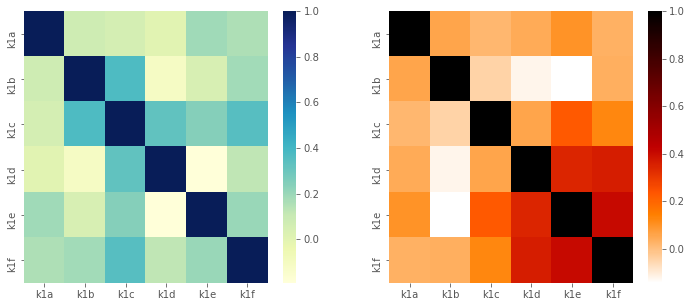

In [16]:
f, axes = plt.subplots(1, 2, figsize =(12, 5))
for i, type_ in enumerate(['angels', 'demons']):
    
    if type_ == 'angels':
        cmap = 'YlGnBu'
        data = df[df['fraud'] == 0][tasks]
    else:
        cmap = 'gist_heat_r'
        data = df[df['fraud'] > 0][tasks]
    sns.heatmap(data.corr(), cmap = cmap, ax = axes[i])

Между баллом за какие задачи самая высокая корреляция у Ангелов? В грейдер отправьте название колонок в порядке возрастания через запятую. __Например:__ `("k1a", "k1f")`. 

In [17]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

names_angels = ("k1c", "k1f")
names_demons = ("k1e", "k1f")

# your code here


In [18]:
# проверка вашего ответа скрыта от вас

Как думаете, какие задачи было тяжелее всего списать? 

__ё) Доля написавших третью контрольную.__

Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

У студентов был выбор: писать или не писать третью контрольную. Если в колонке `k3` стоит $0$, значит студент не стал это делать. Постройте асимптотический $95\%$-й доверительный интервал для разницы долей Ангелов и Демонов, которые решили писать третью контрольную. 

__Примечание:__ На практике, если мы пользуемся асимптотическими доверительными интервалами, мы можем искать границы двумя способами:

* __Первый__ состоит в том, что мы оцениваем стандартное отклонение с помощью $\sqrt{\hat{p} \cdot (1 - \hat{p})} = \sqrt{\frac{1}{n} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 
* __Второй способ__ состоит в том, чтобы оценить стандартное отклонение как  $\sqrt{\frac{1}{n-1} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 

В плане асимптотики это не влияет на выводы, так как обе этих оценки состоятельно оценивают дисперсию. Можно пользоваться любым. Однако, чтобы с грейдером не было проблем и задание зачлось, воспользуйтесь первым способом. 

In [19]:
ang_all = df[df['fraud'] == 0]
dem_all = df[df['fraud'] > 0]
ang_pass = df[df['fraud'] == 0].query('k3 != 0').shape[0]/ang_all.shape[0]
dem_pass = df[df['fraud'] > 0 ].query('k3 != 0').shape[0]/dem_all.shape[0]
ang_pass

0.5504587155963303

In [20]:
def length_ci_for_diff_ratio(hat_p1, hat_p2, n1, n2, p ):
    '''
    Функция, которая возвращет доверительного интервала для разницы долей

    Аргументы:
    - hat_p1, hat_p2 - оценка долей
    - p -  уровень надежности
    - n1, n2 - количество элементов 
    '''
    # внутренняя функцияя для расчета дисперсии
    def var(hat_p, n):
        return hat_p * (1 - hat_p) / n
    
    alpha = (1-p)/2
    coef = stats.norm().isf(alpha)
    
    diff = hat_p1 - hat_p2
    multiplier =  np.sqrt(var(hat_p1 , n1) + var(hat_p2 , n2))
    left, right = diff - coef * multiplier , diff +  coef * multiplier 
    
    return left, right



In [21]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

alpha = 0.05
left, right = length_ci_for_diff_ratio(hat_p1 = ang_pass,
                         hat_p2 = dem_pass, 
                         n1 = ang_all.shape[0], 
                         n2 = dem_all.shape[0], p = 1 - alpha)
delta = right - left

# your code here


In [22]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.1885) < 1e-3

# похожие тесты на другие части задания скрыты от вас


Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

__ж) Снова разница средних__ 

Посмотрим на результаты студентов в динамике. Постройте точный $95\%$ доверительный интервал для средней разницы оценок за вторую и первую контрольные. Пропуски в данных заполните нулями. 

In [23]:
diff = (df['k2'] - df['k1']).mean()
var = (df['k2'] - df['k1']).var(ddof = 1)

In [28]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
n = df.shape[0]
student_rv = stats.t(n -1 )
alpha = 0.05
z_crit = student_rv.ppf(1 - alpha/2)

left =  diff - z_crit *np.sqrt(var / n)      # левая граница интервала
right = diff + z_crit *np.sqrt(var / n)     # правая граница интервала
delta = right -  left    # ширина интервала

# your code here


In [29]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 1.4562881732820103) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

Это домашка подошла к концу. Поздравляю! Теперь вы умеете строить точные доверительные интервалы для нормальных выборок.